In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping
import os
from sklearn.metrics import mean_squared_error

In [5]:
save_path = ('figures/1b1')
if not os.path.isdir(save_path):
    os.makedirs(save_path)

In [6]:
NUM_CLASSES = 7

epochs = 300
batch_size = 8
num_neurons = 30
seed = 10

l_r = 0.001

In [7]:
histories={}

np.random.seed(seed)
tf.random.set_seed(seed)

In [8]:
#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

In [9]:
# Shuffle
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]


In [10]:
no_data= len(X_data)
print(0.7*(no_data))
print(0.3*(no_data))

280.0
120.0


In [11]:
# Normalize
# X ~ N(0,1)
X_data = ((X_data - np.mean(X_data, axis = 0))/ np.std(X_data, axis =0))

In [12]:
trainX = X_data[:280]
trainY = Y_data[:280]

testX = X_data[280:]
testY = Y_data[280:]


In [13]:
# create a network
starter_model = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dense(1, activation = 'linear')
])

In [14]:
starter_model.compile(optimizer='sgd',
              loss=keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [15]:
es = EarlyStopping(monitor='mse', mode='min', verbose=1, patience = 10)

In [16]:
histories['starter'] =starter_model.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        verbose = 1,
                                        validation_data=(testX,testY),
                                        callbacks=[es]
                                       )

Epoch 1/300
35/35 [==============================] - 0s 3ms/step - loss: 0.1543 - mse: 0.1440 - val_loss: 0.0781 - val_mse: 0.0678
Epoch 2/300
35/35 [==============================] - 0s 930us/step - loss: 0.0685 - mse: 0.0582 - val_loss: 0.0624 - val_mse: 0.0521
Epoch 3/300
35/35 [==============================] - 0s 913us/step - loss: 0.0536 - mse: 0.0434 - val_loss: 0.0509 - val_mse: 0.0407
Epoch 4/300
35/35 [==============================] - 0s 912us/step - loss: 0.0454 - mse: 0.0352 - val_loss: 0.0452 - val_mse: 0.0350
Epoch 5/300
35/35 [==============================] - 0s 969us/step - loss: 0.0401 - mse: 0.0299 - val_loss: 0.0410 - val_mse: 0.0309
Epoch 6/300
35/35 [==============================] - 0s 912us/step - loss: 0.0365 - mse: 0.0264 - val_loss: 0.0391 - val_mse: 0.0290
Epoch 7/300
35/35 [==============================] - 0s 940us/step - loss: 0.0340 - mse: 0.0239 - val_loss: 0.0346 - val_mse: 0.0246
Epoch 8/300
35/35 [==============================] - 0s 940us/step - lo

35/35 [==============================] - 0s 969us/step - loss: 0.0121 - mse: 0.0039 - val_loss: 0.0145 - val_mse: 0.0063
Epoch 124/300
35/35 [==============================] - 0s 912us/step - loss: 0.0121 - mse: 0.0039 - val_loss: 0.0145 - val_mse: 0.0064
Epoch 125/300
35/35 [==============================] - 0s 912us/step - loss: 0.0120 - mse: 0.0039 - val_loss: 0.0145 - val_mse: 0.0064
Epoch 126/300
35/35 [==============================] - 0s 883us/step - loss: 0.0120 - mse: 0.0039 - val_loss: 0.0144 - val_mse: 0.0063
Epoch 127/300
35/35 [==============================] - 0s 912us/step - loss: 0.0120 - mse: 0.0039 - val_loss: 0.0145 - val_mse: 0.0064
Epoch 128/300
35/35 [==============================] - 0s 899us/step - loss: 0.0120 - mse: 0.0039 - val_loss: 0.0144 - val_mse: 0.0063
Epoch 129/300
35/35 [==============================] - 0s 912us/step - loss: 0.0119 - mse: 0.0038 - val_loss: 0.0144 - val_mse: 0.0063
Epoch 130/300
35/35 [==============================] - 0s 912us/step 

Epoch 184/300
35/35 [==============================] - 0s 884us/step - loss: 0.0109 - mse: 0.0034 - val_loss: 0.0136 - val_mse: 0.0061
Epoch 185/300
35/35 [==============================] - 0s 883us/step - loss: 0.0109 - mse: 0.0034 - val_loss: 0.0136 - val_mse: 0.0061
Epoch 186/300
35/35 [==============================] - 0s 940us/step - loss: 0.0109 - mse: 0.0034 - val_loss: 0.0136 - val_mse: 0.0061
Epoch 187/300
35/35 [==============================] - 0s 940us/step - loss: 0.0108 - mse: 0.0034 - val_loss: 0.0136 - val_mse: 0.0061
Epoch 188/300
35/35 [==============================] - 0s 940us/step - loss: 0.0108 - mse: 0.0034 - val_loss: 0.0136 - val_mse: 0.0062
Epoch 189/300
35/35 [==============================] - 0s 913us/step - loss: 0.0108 - mse: 0.0034 - val_loss: 0.0136 - val_mse: 0.0061
Epoch 190/300
35/35 [==============================] - 0s 969us/step - loss: 0.0108 - mse: 0.0034 - val_loss: 0.0136 - val_mse: 0.0061
Epoch 191/300
35/35 [==============================] - 

Epoch 245/300
35/35 [==============================] - 0s 997us/step - loss: 0.0100 - mse: 0.0031 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 246/300
35/35 [==============================] - 0s 940us/step - loss: 0.0100 - mse: 0.0031 - val_loss: 0.0130 - val_mse: 0.0062
Epoch 247/300
35/35 [==============================] - 0s 969us/step - loss: 0.0099 - mse: 0.0031 - val_loss: 0.0130 - val_mse: 0.0062
Epoch 248/300
35/35 [==============================] - 0s 940us/step - loss: 0.0099 - mse: 0.0031 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 249/300
35/35 [==============================] - 0s 969us/step - loss: 0.0099 - mse: 0.0031 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 250/300
35/35 [==============================] - 0s 940us/step - loss: 0.0099 - mse: 0.0031 - val_loss: 0.0129 - val_mse: 0.0061
Epoch 251/300
35/35 [==============================] - 0s 940us/step - loss: 0.0099 - mse: 0.0031 - val_loss: 0.0129 - val_mse: 0.0061
Epoch 252/300
35/35 [==============================] - 

In [17]:
# final errors
print('train m.s.e. = %3.3f, test m.s.e. = %3.3f'%(histories['starter'].history['loss'][-1], histories['starter'].history['val_loss'][-1]))

train m.s.e. = 0.009, test m.s.e. = 0.013


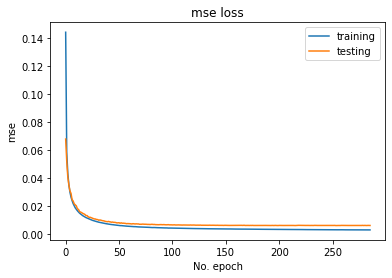

In [18]:
# plot learning curves
plt.plot(histories['starter'].history['mse'], label='training')
plt.plot(histories['starter'].history['val_mse'], label='testing')
plt.ylabel('mse')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.title('mse loss')
plt.savefig('./%s/mse_VS_e'%(save_path))
plt.show()

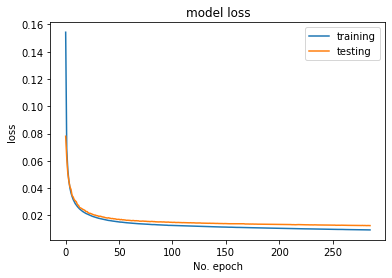

In [19]:
# plot learning curves
plt.plot(histories['starter'].history['loss'], label='training')
plt.plot(histories['starter'].history['val_loss'], label='testing')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.title("model loss")
plt.legend(loc="best")
plt.savefig('./%s/loss_vs_e.png'%(save_path))
plt.show()

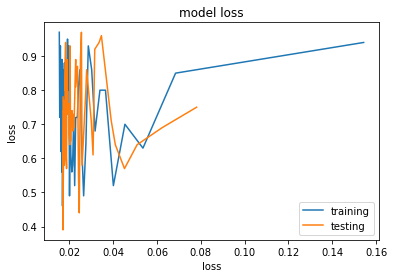

In [20]:
plt.plot( histories['starter'].history['loss'][:50], testY[:50], label='training')
plt.plot(  histories['starter'].history['val_loss'][:50], trainY[:50], label='testing')
plt.ylabel('loss')
plt.xlabel('loss')
plt.title("model loss")
plt.legend(loc="best")
plt.savefig('./%s/loss_vs_loss.png'%(save_path))
plt.show()

In [21]:
print(histories['starter'].history.keys())


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


In [22]:
prediction = starter_model.predict(testX)

In [23]:
print(prediction[:50])

[[0.932215  ]
 [0.7765496 ]
 [0.728181  ]
 [0.6537486 ]
 [0.5907607 ]
 [0.8250681 ]
 [0.778924  ]
 [0.6562734 ]
 [0.8593117 ]
 [0.8914718 ]
 [0.61304116]
 [0.66999644]
 [0.6231684 ]
 [0.7730317 ]
 [0.81252265]
 [0.7333729 ]
 [0.64860946]
 [0.6660523 ]
 [0.63726676]
 [0.5827264 ]
 [0.6494819 ]
 [0.68268937]
 [0.7064066 ]
 [0.50136536]
 [0.8779688 ]
 [0.75579166]
 [0.9710119 ]
 [0.8140092 ]
 [0.80112123]
 [0.6884341 ]
 [0.8879209 ]
 [0.7524985 ]
 [0.8637109 ]
 [0.5301099 ]
 [0.8823638 ]
 [0.72674245]
 [0.64784586]
 [0.4253928 ]
 [0.8643004 ]
 [0.51928365]
 [0.6943217 ]
 [0.79168653]
 [0.74380195]
 [0.8371978 ]
 [0.8831217 ]
 [0.8769032 ]
 [0.66059816]
 [0.71130556]
 [0.8517916 ]
 [0.95912725]]


In [24]:
print(testY[:50])

[[0.94]
 [0.85]
 [0.63]
 [0.7 ]
 [0.52]
 [0.8 ]
 [0.8 ]
 [0.68]
 [0.86]
 [0.93]
 [0.64]
 [0.49]
 [0.64]
 [0.86]
 [0.81]
 [0.72]
 [0.72]
 [0.52]
 [0.71]
 [0.58]
 [0.56]
 [0.61]
 [0.72]
 [0.49]
 [0.93]
 [0.8 ]
 [0.95]
 [0.84]
 [0.78]
 [0.72]
 [0.88]
 [0.71]
 [0.88]
 [0.81]
 [0.86]
 [0.53]
 [0.69]
 [0.46]
 [0.89]
 [0.56]
 [0.76]
 [0.83]
 [0.62]
 [0.84]
 [0.93]
 [0.91]
 [0.76]
 [0.72]
 [0.89]
 [0.97]]


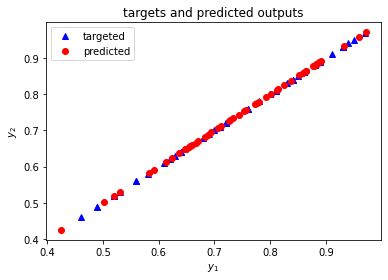

In [25]:
plot_targets = plt.plot(testY[:50], testY[:50], 'b^', label='targeted')
plot_pred = plt.plot(prediction[:50], prediction[:50], 'ro', label='predicted')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('targets and predicted outputs')
plt.legend(loc="best")
plt.savefig('./%s/target_vs_predicted'%(save_path))
plt.legend()

In [27]:
MSE_scaled = mean_squared_error(testY, prediction)
print(MSE_scaled)

0.006126171966333439
